# Example

In [1]:
from agents import Preference,Agent,SocialNetwork
from digraphs import generate_random_preorder,generate_random_arborescence
from random import choice
from networkx import random_regular_graph,set_node_attributes,neighbors
from parallel import update_preference_profile
from numpy.random import binomial
from math import ceil

In [11]:
#initial data for problem
n_agents = 10
n_alternatives = 8
n_neighbors = 3
edge_prob = 0.1
time_horizon = 10

#genrerate random initial DAGs which have exactly n_comparisons edges
dags = [generate_random_preorder(n_agents, edge_prob) for node in range(n_agents)]

#generate 'r_median' for each agent
r_median_list = [choice(range(n_neighbors))+1 for node in range(n_agents) ]

#generate random 'update_rule' for each agent
update_rules= ['prior','posterior','join','meet']
update_rule_list = [choice(update_rules) for node in range(n_agents)]

#generate a dict of agents
agent_dict = {node: Agent(Preference(dags[node]),r_median_list[node],update_rule_list[node]) \
              for node in range(n_agents)}

#generate a random graph defining agent-agent interactions
graph = random_regular_graph(n_neighbors,n_agents)

#generate a 'SocialNetwork' instance based on 'graph' and 'agent_dict'
network = SocialNetwork(graph,agent_dict)

In [12]:
#given the inital 'network', update 
results = [network.copy()]
for t in range(1,time_horizon):
    new_agent_dict = {}
    for node in graph.nodes():
        new_agent_dict[node] = \
        Agent(network.update_preference(node),r_median_list[node],update_rule_list[node])
    results.append(SocialNetwork(graph,new_agent_dict).copy())

In [20]:
test_node = choice(range(n_agents))

print('n_agents = '+ str(n_agents))
print('n_neighbors = '+ str(n_neighbors))
print('n_algernatives = '+str(n_alternatives))
print('n_comparisons = '+str(n_comparisons))
print('\n')
print('test_node = '+ str(test_node))
print('update_rule = ' + str(agent_dict[test_node].update_rule))
print('r_median = ' + str(agent_dict[test_node].r_median))
print('\n')
for t in range(time_horizon):
    print('Time: '+str(t))
    print(results[t].get_digraph(test_node,'clean').edges)

n_agents = 10
n_neighbors = 3
n_algernatives = 8
n_comparisons = 4


test_node = 8
update_rule = posterior
r_median = 1


Time: 0
[(0, 2), (0, 8), (0, 1), (0, 4), (0, 6), (0, 7), (0, 9), (1, 7), (5, 3), (6, 9), (6, 1), (6, 7), (8, 4), (8, 6), (8, 7), (8, 9), (8, 1), (9, 1), (9, 7)]
Time: 1
[(0, 9), (0, 6), (1, 3), (1, 5), (1, 6), (1, 9), (1, 4), (1, 8), (1, 0), (1, 2), (1, 7), (2, 1), (2, 5), (2, 9), (2, 0), (2, 3), (2, 6), (2, 4), (2, 8), (2, 7), (3, 4), (3, 6), (3, 8), (3, 5), (3, 9), (3, 0), (3, 1), (3, 2), (3, 7), (4, 6), (4, 8), (4, 3), (4, 5), (4, 9), (4, 0), (4, 1), (4, 2), (4, 7), (5, 0), (5, 9), (5, 6), (5, 1), (5, 2), (5, 7), (5, 3), (5, 4), (5, 8), (7, 4), (7, 6), (7, 3), (7, 5), (7, 9), (7, 8), (7, 0), (7, 1), (7, 2), (8, 5), (8, 1), (8, 2), (8, 3), (8, 4), (8, 7), (8, 9), (8, 0), (8, 6), (9, 6)]
Time: 2
[(1, 3), (1, 5), (1, 6), (1, 9), (3, 5), (3, 9), (3, 6), (4, 3), (4, 5), (4, 6), (4, 9), (7, 4), (7, 6), (7, 3), (7, 5), (7, 9), (9, 6)]
Time: 3
[(1, 3), (1, 5), (1, 6), (1

# Network

In [12]:
import matplotlib.pyplot as plt
from networkx import draw_networkx_nodes,draw_networkx_edges,draw_networkx_labels,circular_layout

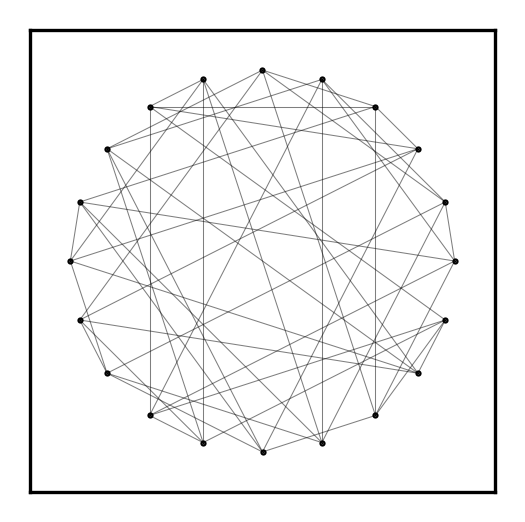

In [13]:
plt.figure(figsize=[2,2],dpi=300)
pos = circular_layout(graph)
draw_networkx_nodes(graph,pos,node_color='black',node_size=0.25)
draw_networkx_edges(graph,pos,width=0.25,alpha=0.5)
plt.show()

# Preferences

In [22]:
from networkx.algorithms.tree.branchings import Edmonds
from agents import Preference,Agent,SocialNetwork
from digraphs import generate_random_preorder
import networkx as nx
import matplotlib.pyplot as plt
from functools import reduce

In [34]:
digraph_1 = pref_1.digraph
digraph_2 = pref_2.digraph.reverse()
dist = 0
for i in range(n_alternatives):
    for j in range(n_alternatives):
        if (i,j) in digraph_1.edges and (j,i) in digraph_2.edges:
            dist+=1
dist

1

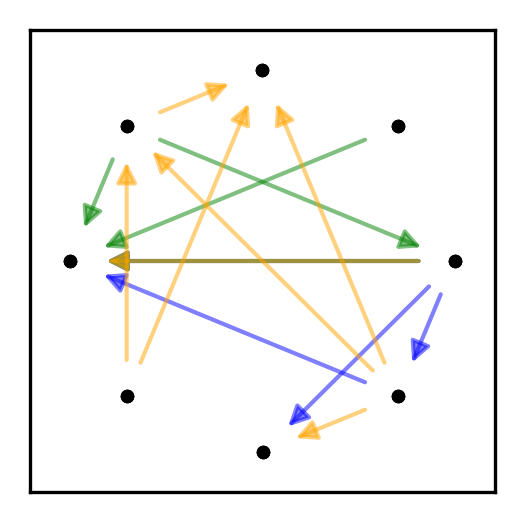

In [33]:
n_alternatives = 8
edge_prob = 0.1

pref_1 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_2 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_3 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_join = pref_1.join(pref_2)
pref_meet = pref_1.meet(pref_2)

fig,ax = plt.subplots(figsize=[2,2],dpi=300)
pref_1.plot(edge_color='blue',ax=ax)
pref_2.plot(edge_color='green',ax=ax)
pref_3.plot(edge_color='orange',ax=ax)

## Arborescences

In [20]:
from digraphs import generate_random_arborescence
from agents import Preference
import matplotlib.pyplot as plt
from networkx.algorithms.tree.branchings import Edmonds


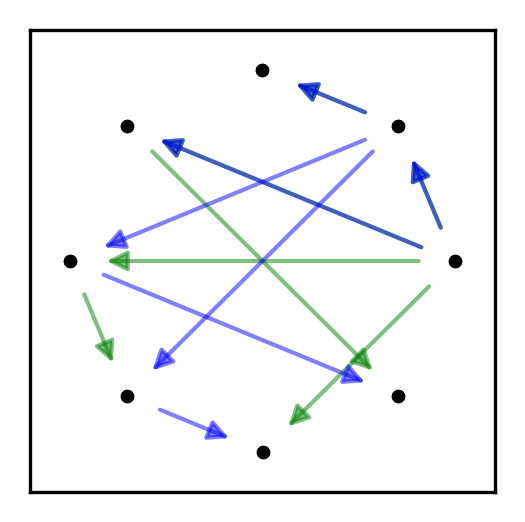

In [19]:
n_alternatives = 8
tree_1 = generate_random_arborescence(n_alternatives)
tree_2 = generate_random_arborescence(n_alternatives)
pref_1 = Preference(tree_1)
pref_2 = Preference(tree_2)
fig,ax = plt.subplots(figsize=[2,2],dpi=300)
pref_1.plot(edge_color='green',ax=ax)
pref_2.plot(edge_color='blue',ax=ax)
plt.show()